## Housing Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define file path
filepath = "data/Housing.csv"
df = pd.read_csv(filepath)

# 1. Preliminary Data Examination

In [3]:
df.shape

(545, 13)

In [4]:
df.head().T

,0,1,2,3,4
price,13300000,12250000,12250000,12215000,11410000
area,7420,8960,9960,7500,7420
bedrooms,4,4,3,4,4
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
mainroad,yes,yes,yes,yes,yes
guestroom,no,no,no,no,yes
basement,no,no,yes,yes,yes
hotwaterheating,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes


In [5]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# 2. Enhanced Exploratory Data Analysis (EDA)

In [6]:
#  Checking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
# Basic Statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


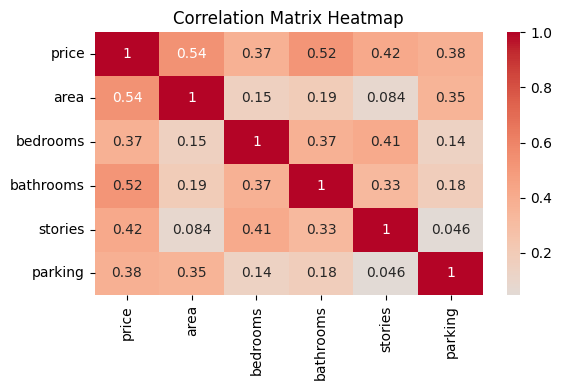

In [8]:
# Correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

## Correlation Heatmap Analysis

The correlation heatmap provides insights into the relationships between numerical features in the housing price dataset.

### Strong Positive Correlations
- **Price vs. Area (0.54):**  
  A moderate positive correlation indicates that larger houses tend to be more expensive.
- **Price vs. Bathrooms (0.52):**  
  A moderate positive correlation suggests that houses with more bathrooms are typically more valuable.

### Moderate Positive Correlations
- **Price vs. Stories (0.42):**  
  Multi-story houses are often larger or more desirable, contributing to higher prices.
- **Price vs. Bedrooms (0.37)** and **Price vs. Parking (0.38):**  
  Weaker positive correlations are observed between price and the number of bedrooms and parking spaces.

### Feature Interrelationships
- **Area vs. Parking (0.35):**  
  Larger houses are more likely to have more parking spaces.
- **Bedrooms vs. Bathrooms (0.37)** and **Bedrooms vs. Stories (0.41):**  
  These reflect expected relationships based on housing design trends.

### Implications for the Project
1. **Feature Importance:**  
   - Area and Bathrooms are the strongest predictors of price and should be prioritized for modeling.
2. **Multicollinearity:**  
   - Moderate correlations between some features indicate potential multicollinearity, which can affect the performance of certain machine learning models.
3. **Further Analysis:**  
   - Correlation captures only linear relationships. Further analysis, such as scatter plots or other visualizations, may reveal non-linear relationships or additional patterns in the data.


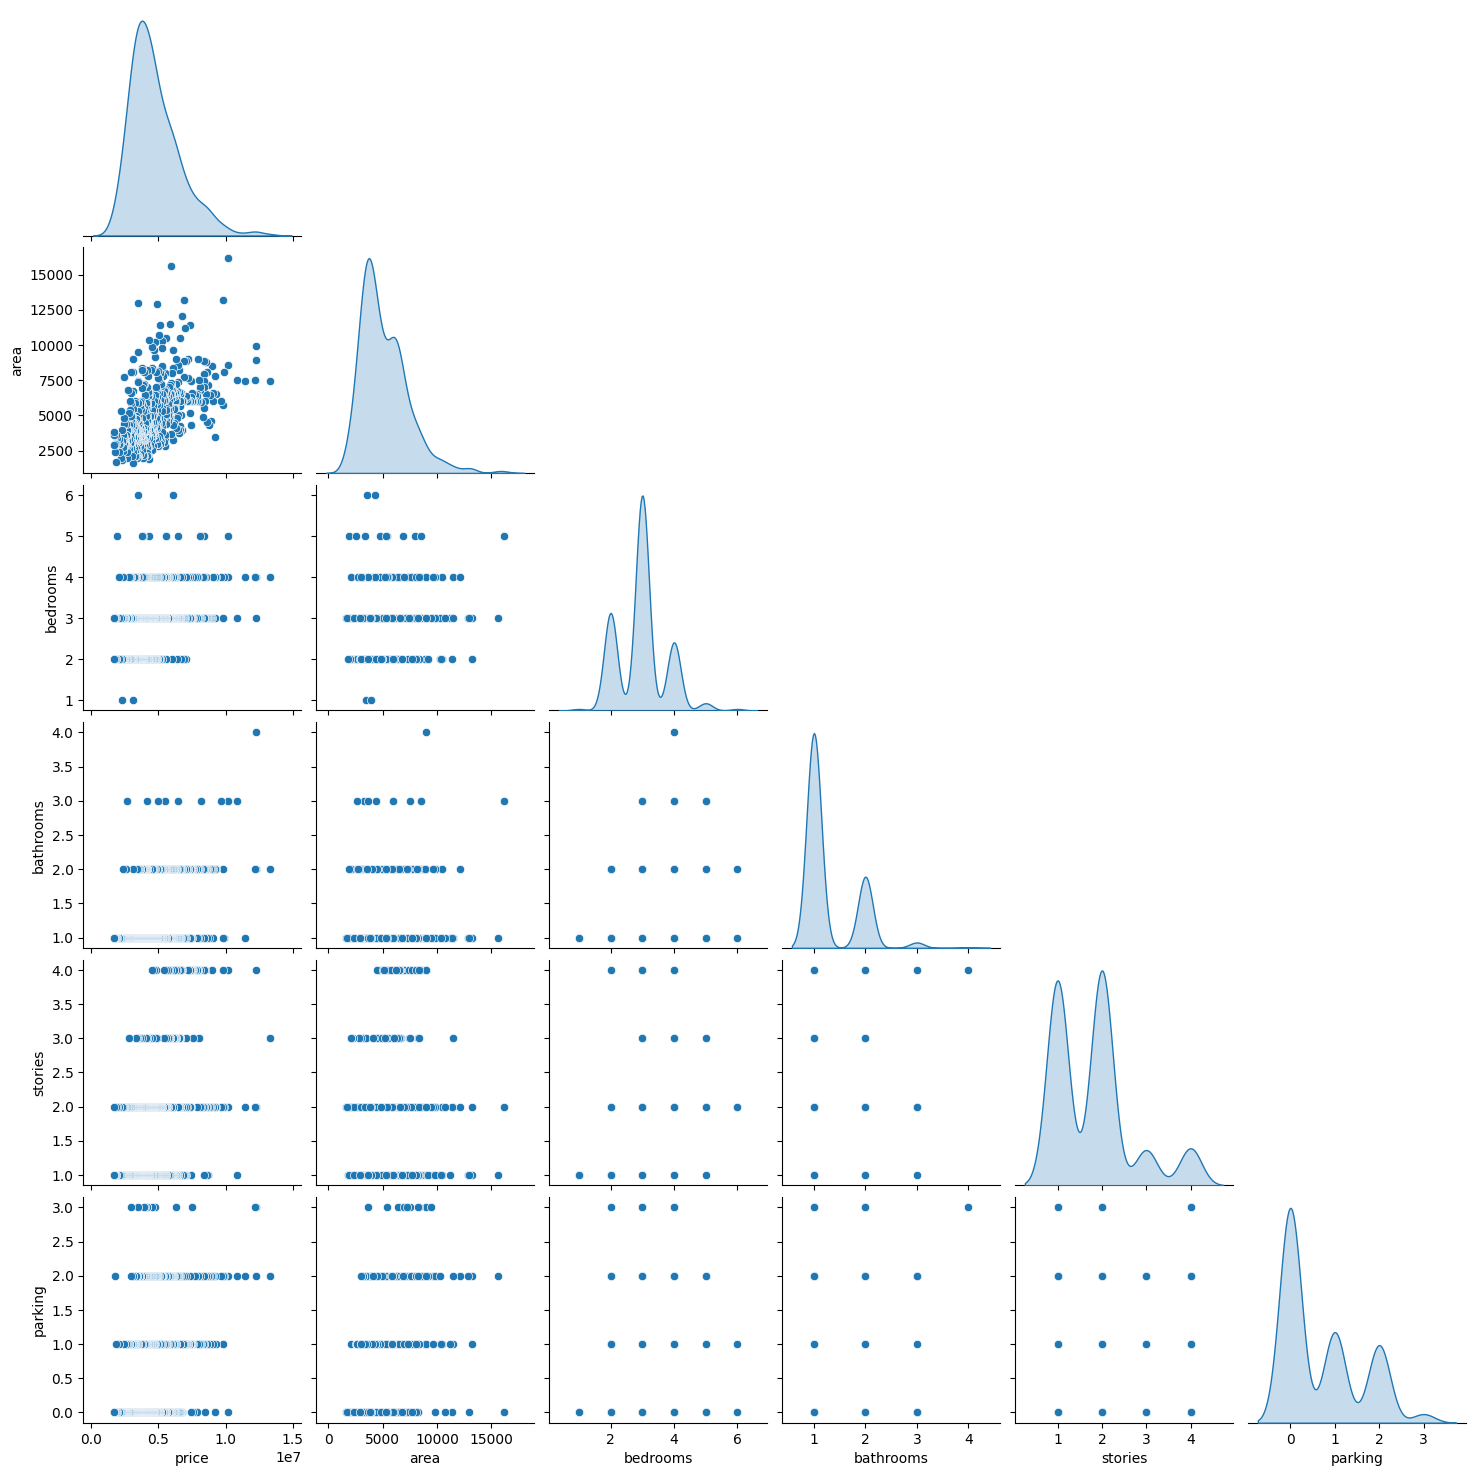

In [ ]:
# Using Pair plots to further explore the relationships between features
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

## Pair Plot Analysis

### **Overview**
The pair plot offers a detailed visualization of the relationships between numerical features in the dataset, providing valuable insights for data preprocessing and model development.

##### **Key Insights**

#### **1. Correlation Analysis**
- **Strong Positive Correlations**:  
  - Price vs. Area  
  - Price vs. Number of Bathrooms  
  - Price vs. Number of Bedrooms  

- **Moderate Positive Correlations**:  
  - Price vs. Number of Stories  
  - Price vs. Parking Spaces  

#### **2. Feature Importance**
- **Key Predictors of Price**:  
  - **Area**, **Number of Bathrooms**, and **Number of Bedrooms** show strong correlations with the target variable, indicating their importance in predicting house prices.

#### **3. Identifying Outliers**
- **Observations from KDE Plots**:  
  - Outliers are evident in features such as **price** and **area**.  
  - These outliers may impact model performance and require appropriate handling through techniques like trimming, winsorization, or robust modeling.

#### **4. Non-linear Relationships**
- **Scatter Plot Observations**:  
  - Certain features, like **price vs. number of bedrooms**, exhibit non-linear patterns.  
  - This suggests the potential need for non-linear models to better capture these relationships.

#### **5. Multicollinearity**
- **KDE Plot Similarities**:  
  - Features like **area** and **number of bedrooms** exhibit similar distribution patterns, indicating possible multicollinearity.  
  - Addressing this through **feature selection** or **dimensionality reduction** (e.g., PCA) is critical to avoid issues in some machine learning models.

### **Conclusion**
This pair plot analysis reveals critical insights about the relationships and distributions of features within the dataset. These findings will guide:  
- **Feature Selection**: Prioritizing important predictors.  
- **Data Preprocessing**: Handling outliers and addressing multicollinearity.  
- **Model Building**: Exploring non-linear models to enhance prediction accuracy.  
These steps will ultimately contribute to a robust and accurate housing price prediction model.


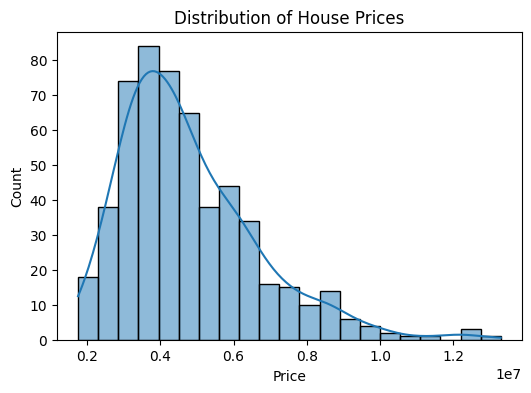

In [10]:
# Distribution of target variable (price)
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

## Histogram Analysis

### **Key Observations**
- The histogram and kernel density estimation (KDE) plot reveal a **right-skewed distribution** of house prices.  
  - Most houses are clustered at the **lower end** of the price spectrum, representing more affordable options.  
  - A smaller proportion of houses fall into the **high-price range**, likely representing luxury homes.  

- This distribution aligns with **typical real estate market trends**, where affordable housing dominates the market, while high-priced luxury homes form a niche segment.

### **Implications for Modeling**
- **Outliers and Influence on Models**  
  - The long tail at the high end of the price range indicates the presence of outliers.  
  - These outliers can disproportionately affect the mean, variance, and predictive accuracy of many machine learning algorithms.

- **Recommendations for Mitigation**  
  - Apply a **logarithmic transformation** to normalize the price distribution.  
  - Use robust regression techniques to minimize the impact of extreme values.  
  - Investigate other approaches like winsorization or using median-based metrics in model evaluation.

### **Insights for Feature Engineering**
- **Exploring Relationships**  
  - Relationships between house prices and other features (e.g., location, number of bedrooms, and amenities) are worth investigating.  
  - Such analyses can guide the creation of new features or improve feature selection.

- **Segmenting the Market**  
  - The distribution suggests the presence of distinct market segments, such as affordable housing and luxury homes.  
  - Segmentation may allow for tailored models that improve overall prediction accuracy.

### **Conclusion**
This analysis provides a clear understanding of the distribution of house prices and its implications for predictive modeling. Addressing the skewed distribution and outliers will enhance model performance and ensure more accurate predictions. Additionally, exploring feature relationships and potential segmentation can provide further opportunities for feature engineering and market insights.

# 3. Data Preprocessing

In [11]:
df_processed = df.copy()

# Convert binary categorical variables to numeric
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df_processed[col] = (df_processed[col].str.lower() == 'yes').astype(int)

df_processed = pd.get_dummies(df_processed, columns=['furnishingstatus'], prefix='furnishing', drop_first=True)

# Apply logarithmic transformation to target variable to address long tail
df_processed['price'] = np.log1p(df_processed['price'])

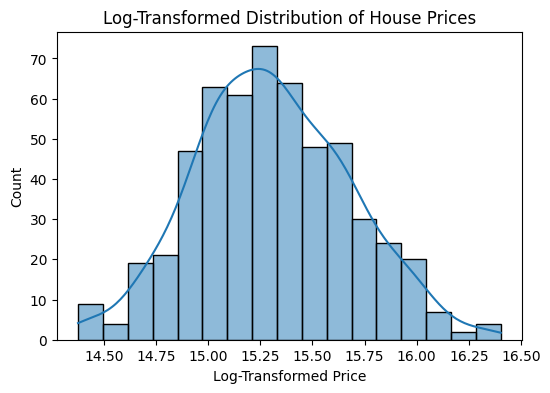

In [12]:
# Regenerating the distribution histogram for the target variable
plt.figure(figsize=(6, 4))
sns.histplot(df_processed['price'], kde=True)
plt.title('Log-Transformed Distribution of House Prices')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Count')
plt.show()

# 4. Feature engineering

In [ ]:
df_processed['price_per_sqft'] = df_processed['price'] / df_processed['area']
df_processed['bath_bed_ratio'] = df_processed['bathrooms'] / df_processed['bedrooms']
df_processed['parking_to_stories_ratio'] = df_processed['parking'] / df_processed['stories']

df_processed['total_rooms'] = df_processed['bedrooms'] + df_processed['bathrooms']
df_processed['area_per_room'] = df_processed['area'] / df_processed['total_rooms']
df_processed['bathroom_per_floor'] = df_processed['bathrooms'] / df_processed['stories']

df_processed['room_quality_score'] = (df_processed['bathrooms'] * 2 + 
                                      df_processed['bedrooms']) / df_processed['stories']

df_processed['luxury_score'] = (df_processed['parking'] + 
                                df_processed['airconditioning'] + 
                                df_processed['basement'] + 
                                df_processed['guestroom']) / 4

# Feature interaction terms
df_processed['area_bathrooms'] = df_processed['area'] * df_processed['bathrooms']
df_processed['area_stories'] = df_processed['area'] * df_processed['stories']
df_processed['bathrooms_stories'] = df_processed['bathrooms'] * df_processed['stories']

# Address potential infinite or NaN values from feature engineering
df_processed.replace([np.inf, -np.inf], np.nan, inplace=True)
df_processed.fillna(0, inplace=True)

In [16]:
# Handling outliers using z-scores
from scipy import stats

def remove_outliers(df, columns, z_score=3):
    for col in columns:
        z_scores = stats.zscore(df[col])
        df = df[abs(z_scores) < z_score]
    return df

numeric_columns = ['area', 'price', 'bathrooms', 'bedrooms']
df_processed = remove_outliers(df_processed, numeric_columns)

# Separating features (X) and target variable (y)
X = df_processed.drop(['price', 'price_per_sqft'], axis=1)
y = df_processed['price']